In [12]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")
combine_df=combine_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug']]

# Display the data table for preview

combine_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [16]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_tum_Vol = combine_df.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
Mean_tum_Vol_df = pd.DataFrame(Mean_tum_Vol)
Mean_tum_Vol_df=Mean_tum_Vol_df.reset_index()
# Preview DataFrame
Mean_tum_Vol_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror_tum_Vol = combine_df.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
stderror_tum_Vol_df = pd.DataFrame(stderror_tum_Vol)
stderror_tum_Vol_df=stderror_tum_Vol_df.reset_index()
# Preview DataFrame
stderror_tum_Vol_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [20]:
# Minor Data Munging to Re-Format the Data Frames
pvt_drug_tum_vol=Mean_tum_Vol_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
pvt_drug_tum_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


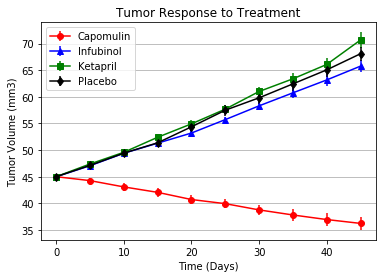

In [31]:
pvt_stderror_drug_tum=stderror_tum_Vol_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Generate the Plot (with Error Bars)
plt.errorbar(pvt_drug_tum_vol.index, pvt_drug_tum_vol["Capomulin"],yerr=pvt_stderror_drug_tum["Capomulin"],color='r', marker='o', label="Capomulin")
plt.errorbar(pvt_drug_tum_vol.index, pvt_drug_tum_vol["Infubinol"],yerr=pvt_stderror_drug_tum["Infubinol"],color='b', marker='^', label="Infubinol")
plt.errorbar(pvt_drug_tum_vol.index, pvt_drug_tum_vol["Ketapril"],yerr=pvt_stderror_drug_tum["Ketapril"],color='g', marker='s', label="Ketapril")
plt.errorbar(pvt_drug_tum_vol.index, pvt_drug_tum_vol["Placebo"],yerr=pvt_stderror_drug_tum["Placebo"],color='k', marker='d', label="Placebo")
plt.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')
# Save the Figure
plt.savefig("../Images/tumor_response.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [40]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_mean = combine_df.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"]
# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(metastatic_mean)
metastatic_mean_df=metastatic_mean_df.reset_index()
# Preview DataFrame
metastatic_mean_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [41]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_stderr = combine_df.groupby(['Drug', 'Timepoint']).sem()["Metastatic Sites"]
# Convert to DataFrame
metastatic_stderr_df = pd.DataFrame(metastatic_stderr)
metastatic_stderr_df=metastatic_stderr_df.reset_index()
# Preview DataFrame
metastatic_stderr_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [42]:
# Minor Data Munging to Re-Format the Data Frames
pvt_metastatic_mean_df=metastatic_mean_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pvt_metastatic_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [43]:
# Minor Data Munging to Re-Format the Data Frames
pvt_metastatic_stderr_df=metastatic_stderr_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pvt_metastatic_stderr_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


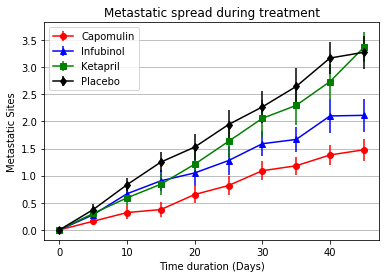

In [44]:
# Generate the Plot (with Error Bars)
plt.errorbar(pvt_metastatic_mean_df.index, pvt_metastatic_mean_df["Capomulin"],yerr=pvt_metastatic_stderr_df["Capomulin"],color='r', marker='o', label="Capomulin")
plt.errorbar(pvt_metastatic_mean_df.index, pvt_metastatic_mean_df["Infubinol"],yerr=pvt_metastatic_stderr_df["Infubinol"],color='b', marker='^', label="Infubinol")
plt.errorbar(pvt_metastatic_mean_df.index, pvt_metastatic_mean_df["Ketapril"],yerr=pvt_metastatic_stderr_df["Ketapril"],color='g', marker='s', label="Ketapril")
plt.errorbar(pvt_metastatic_mean_df.index, pvt_metastatic_mean_df["Placebo"],yerr=pvt_metastatic_stderr_df["Placebo"],color='k', marker='d', label="Placebo")
plt.legend(loc="upper left")
plt.title("Metastatic spread during treatment")
plt.xlabel("Time duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(axis='y')
# Save the Figure
plt.savefig("../Images/Metastatic_Response.png")
# Show the Figure
plt.show()

## Survival Rates

In [49]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_mean = combine_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
# Convert to DataFrame
survival_mean_df = pd.DataFrame(survival_mean )
survival_mean_df = survival_mean_df.reset_index()
# Preview DataFrame
survival_mean_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [53]:
# Minor Data Munging to Re-Format the Data Frames
pvt_survival_mean_df=survival_mean_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']
# Preview the Data Frame
pvt_survival_mean_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


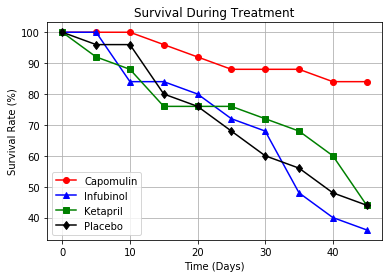

In [51]:
plt.plot(pvt_survival_mean_df.index, pvt_survival_mean_df["Capomulin"]*4,color='r', marker='o', label="Capomulin")
plt.plot(pvt_survival_mean_df.index, pvt_survival_mean_df["Infubinol"]*4,color='b', marker='^', label="Infubinol")
plt.plot(pvt_survival_mean_df.index, pvt_survival_mean_df["Ketapril"]*4,color='g', marker='s', label="Ketapril")
plt.plot(pvt_survival_mean_df.index, pvt_survival_mean_df["Placebo"]*4,color='k', marker='d', label="Placebo")

plt.legend(loc="bottom left")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
#set grid on plot
plt.grid()
#Save and display the chart
plt.savefig("../Images/survival_rate.png")
plt.show()

## Summary Bar Graph

In [55]:
# Calculate the percent changes for each drug

drug_pct_change = pd.DataFrame(pvt_drug_tum_vol)
pct_difference = drug_pct_change.T[drug_pct_change.index[-1]] - drug_pct_change.T[drug_pct_change.index[0]]
drug_change_pct = pct_difference / drug_pct_change.T[drug_pct_change.index[0]] * 100

# Display the data to confirm
drug_change_pct

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

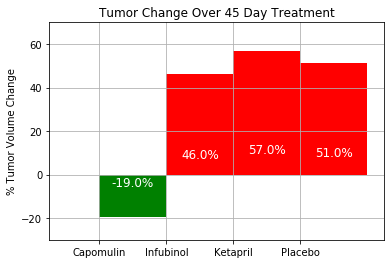

In [57]:
# Store all Relevant Percent Changes into a Tuple
drug_pct_tuple = (drug_change_pct["Capomulin"], drug_change_pct["Infubinol"], drug_change_pct["Ketapril"], drug_change_pct["Placebo"])

# Splice the data between passing and failing drugs

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fig, ax = plt.subplots()
yaxis = drug_pct_tuple

# Orient widths. Add labels, tick marks, etc. 
plt.ylabel("% Tumor Volume Change")
xaxis = np.arange(len(drug_pct_tuple))
plt.xticks(xaxis, drugs)
plt.grid()
plt.ylim(-30, 70)
plt.xlim(-.75, 4.25, 1)
plt.title("Tumor Change Over 45 Day Treatment")

for i,y in enumerate(yaxis):
    if y<0:
        bar1 = plt.bar(xaxis[i], y, color = "g", width=1, alpha=1, align="edge")
    else:
        bar1 = plt.bar(xaxis[i], y, color = "r", width=1, alpha=1, align="edge")

for i, y in enumerate(yaxis):
    plt.text(i+.5,y/5, s=str(round(drug_pct_tuple[i],0))+"%", fontsize=12, color="white",
            horizontalalignment="center", verticalalignment="center")


# Save the Figure
plt.savefig("../Images/tumor_vol_change.png")
# Show the Figure
plt.show()